# Quickstart

In this simple example we will generate some simulated data, and fit them with 3ML.

Let's start by generating our dataset:


In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
%%capture
from threeML import *

In [3]:
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

In [4]:
# Let's generate some data with y = Powerlaw(x)

gen_function = Powerlaw()


# Generate a dataset using the power law, and a
# constant 30% error

x = np.logspace(0, 2, 50)

xyl_generator = XYLike.from_function(
    "sim_data", function=gen_function, x=x, yerr=0.3 * gen_function(x)
)

y = xyl_generator.y
y_err = xyl_generator.yerr

12:47:42 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=401206;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=882910;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

12:47:43 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=987846;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=886288;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

We can now fit it easily with 3ML:

In [5]:
fit_function = Powerlaw()

xyl = XYLike("data", x, y, y_err)

parameters, like_values = xyl.fit(fit_function)

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=63812;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=446049;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=817052;file:///home/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=148404;file:///home/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=273194;file:///home/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=263552;file:///home/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,1.11 +/- 0.09,1 / (cm2 keV s)
source.spectrum.main.Powerlaw.index,-2.041 +/- 0.031,


Correlation matrix:

1.00,-0.86
-0.86,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
data,30.052905
total,30.052905


Values of statistical measures:

,statistical measures
AIC,64.361129
BIC,67.929855


Plot data and model:

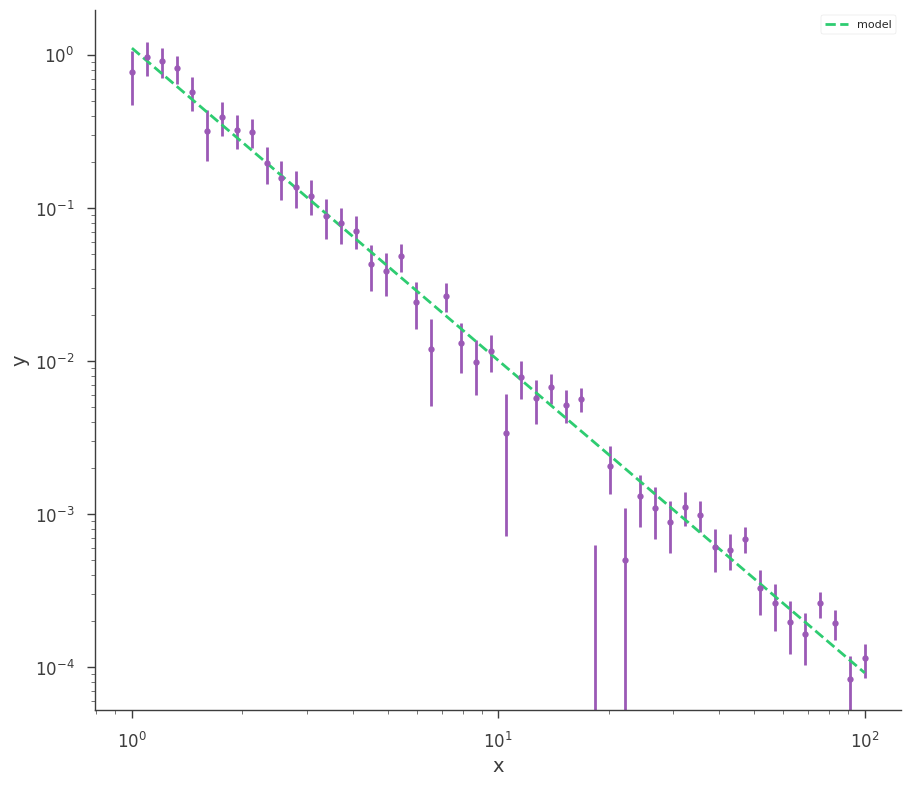

In [6]:
fig = xyl.plot(x_scale="log", y_scale="log")

Compute the goodness of fit using Monte Carlo simulations (NOTE: if you repeat this exercise from the beginning many time, you should find that the quantity "gof" is a random number distributed uniformly between 0 and 1. That is the expected result if the model is a good representation of the data)

In [7]:
gof, all_results, all_like_values = xyl.goodness_of_fit()

print("The null-hypothesis probability from simulations is %.2f" % gof["data"])

Goodness of fit computation:   0%|          | 0/1000 [00:00<?, ?it/s]

The null-hypothesis probability from simulations is 0.09


The procedure outlined above works for any distribution for the data (Gaussian or Poisson). In this case we are using Gaussian data, thus the log(likelihood) is just half of a $\chi^2$. We can then also use the $\chi^2$ test, which gives a close result without performing simulations:

In [8]:
import scipy.stats

# Compute the number of degrees of freedom
n_dof = len(xyl.x) - len(fit_function.free_parameters)

# Get the observed value for chi2
# (the factor of 2 comes from the fact that the Gaussian log-likelihood is half of a chi2)
obs_chi2 = 2 * like_values["-log(likelihood)"]["data"]

theoretical_gof = scipy.stats.chi2(n_dof).sf(obs_chi2)

print("The null-hypothesis probability from theory is %.2f" % theoretical_gof)

The null-hypothesis probability from theory is 0.11


There are however many settings where a theoretical answer, such as the one provided by the $\chi^2$ test, does not exist. A simple example is a fit where data follow the Poisson statistic. In that case, the MC computation can provide the answer.